## Q4

<h3> in this section we want to implement histogram matching </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    #######################
    #    your code here   #
    #######################
    hist = np.zeros(256,dtype=int)
    num_rows = np.shape(image)[0]
    num_columns = np.shape(image)[1]
    #calculate histogram
    for i in range(0,num_rows):
          for j in range(0,num_columns):
                hist[image[i,j]]+=1                  
    return hist

In [ ]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''
  
  #######################
  #    your code here   #
  #######################
  cdf=np.zeros(256,dtype=float)  
  num_rows = np.shape(channel)[0]
  num_columns = np.shape(channel)[1]
  hist=calc_hist(channel)
  cdf[0]=hist[0]/((num_rows)*(num_columns))  
  for i in range(1,256):
        # cdf[i]=cdf[i-1]+hist[i]/Image dimensions
        cdf[i]+=cdf[i-1]+(hist[i]/((num_rows)*(num_columns)))
  return cdf

In [ ]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image 
  '''
  output_image = src_image.copy()
  output_image2 = src_image.copy()
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  for channel, title in channels:
    #######################
    #    your code here   #
    #######################
    cdfsrc=calc_cdf(output_image[:,:,channel])
    cdfref=calc_cdf(ref_image[:,:,channel]) 
    for i in range(0,256):
        # find index of nearest element to cdfsrc[i] 
        idx=np.abs(cdfref-cdfsrc[i]).argmin()
        #replace i to idx in  output_image2      
        output_image2[:,:,channel][output_image[:,:,channel]==i]=idx
  output_image=output_image2      
        
  return output_image

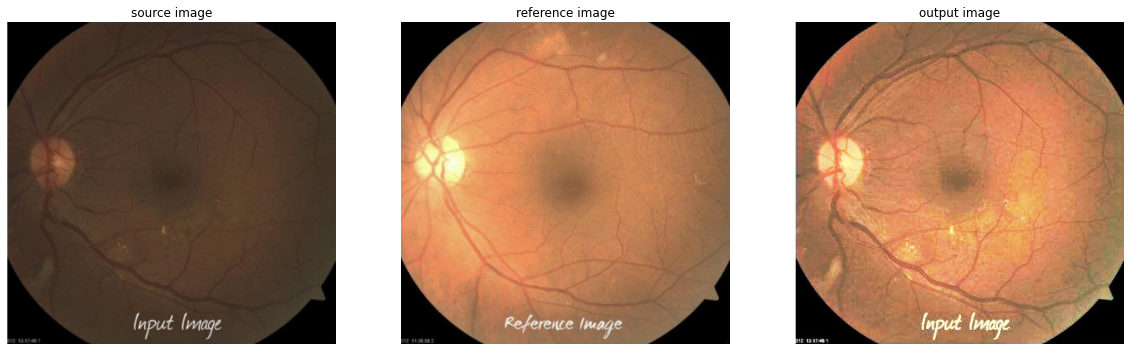

In [48]:
# Do not change this cell
src = cv2.imread(r'Q4_images/input.png')
ref = cv2.imread(r'Q4_images/ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

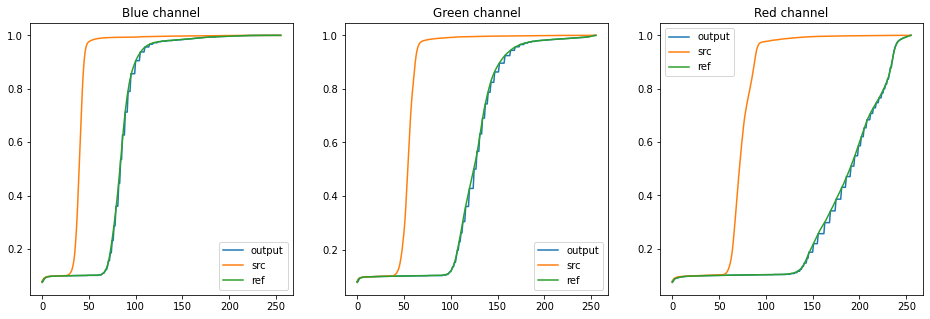

In [49]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)